# Parallel view performance test 

## Setup

In [54]:
import uuid
import random
import requests
import json

from cloudant import cloudant, Cloudant
from getpass import getpass

In [35]:
cloudant_username = raw_input('Username: ')

Username: physion-testy016


In [36]:
cloudant_password = getpass('Password: ')

Password: ········


## Fixture

In [19]:
n_users = int(input('Users: '))

Users: 1000


In [26]:
n_docs = n_users * 1000

In [27]:
teams = [str(uuid.uuid4()) for x in xrange(n_users * 10)]

In [28]:
owners = [str(uuid.uuid4()) for x in xrange(n_users)]

In [29]:
ids = [str(uuid.uuid4()) for x in xrange(n_docs)]

In [55]:
with open('fixture.json', 'w') as outfile:
    json.dump({'ids': ids, 'teams': teams, 'users': owners}, outfile)

In [51]:
def random_subset(col, num=1):
    indices = random.sample(range(len(col)), num)
    return [col[i] for i in sorted(indices)]

In [ ]:
test_db = 'test'

with cloudant(cloudant_username, cloudant_password, account=cloudant_username) as client:
    try:
        db = client[test_db]
    except KeyError:
        db = client.create_database(test_db)
    
    for id in ids:
        doc = {
            '_id': id,
            'owner': random_subset(owners, 1)[0],
            'attributes': {
                'foo': 'bar',
                'baz': 10
            },
            'links': {
                '_collaboration_roots': random_subset(teams, 3)
            }
        }
        
        db.create_document(doc)

## Analysis

In [1]:
import pandas as pd

In [6]:
matplotlib inline

In [3]:
df = pd.read_csv('requests_1456857523.09.csv')

In [4]:
df.head()

,Method,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s
0,GET,/test/_design/api/_view/all_docs?keys=%5B%5B%2...,1,0,890,892,892,892,52,0.03
1,GET,/test/_design/api/_view/all_docs?keys=%5B%5B%2...,1,0,8500,8528,8528,8528,52,0.03
2,GET,/test/_design/api/_view/all_docs?keys=%5B%5B%2...,0,0,0,0,0,0,0,0.00
3,GET,/test/_design/api/_view/all_docs?keys=%5B%5B%2...,1,0,2000,2019,2019,2019,52,0.03
4,GET,/test/_design/api/_view/all_docs?keys=%5B%5B%2...,1,0,1700,1658,1658,1658,52,0.03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111b9ddd0>]], dtype=object)

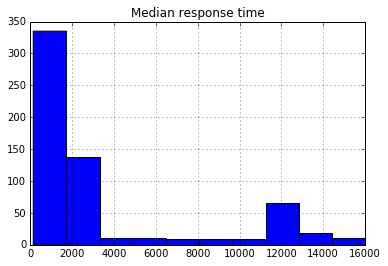

In [12]:
df[df['Median response time'] > 0].hist('Median response time')

In [6]:
df['Median response time'].median()

870.0